In [22]:
import tensorflow
import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [23]:
def get_data(num_samples_per_class):
    
    x1 = np.random.normal(size=(num_samples_per_class, 2))
    x2 = np.random.normal(size=(num_samples_per_class, 2)) + 2
    
    y1 = np.zeros(num_samples_per_class)
    y2 = np.ones(num_samples_per_class)
    
    return np.vstack((x1, x2)), np.hstack((y1, y2))

In [24]:
np.random.normal(size=(2, 2)) + 10

array([[  9.01247443,   9.1075992 ],
       [  9.65065281,  10.36269451]])

In [25]:
num_samples_per_class = 100
x, y = get_data(num_samples_per_class)

print(x.shape, y.shape)

(200, 2) (200,)


In [26]:
a = [1, 2, 3]

print(a[2:])

[3]


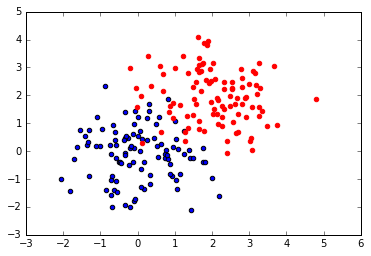

In [27]:
plt.figure()
plt.scatter(x[:100, 0], x[:100, 1])
plt.scatter(x[100:, 0], x[100:, 1], color='r')

In [28]:
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential([
    Dense(16, input_dim=2),
    Activation('relu'),
    Dense(16),
    Activation('relu'),
    Dense(1),
    Activation('sigmoid'),
])

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 16)            48          dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 16)            0           dense_1[0][0]                    
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 16)            272         activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 16)            0           dense_2[0][0]                    
___________________________________________________________________________________________

In [29]:
sgd = keras.optimizers.SGD(lr=0.01)

model.compile(loss='binary_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

In [30]:
X_train, Y_train = get_data(num_samples_per_class)

print(Y_train[0:10])
print(Y_train[100:110])

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]


In [42]:
history = model.fit(X_train, Y_train, batch_size=16, nb_epoch=10, verbose=1)

Epoch 1/10
200/200 [==============================] - 0s - loss: 0.2024 - acc: 0.9100     
Epoch 2/10
200/200 [==============================] - 0s - loss: 0.2016 - acc: 0.9100     
Epoch 3/10
200/200 [==============================] - 0s - loss: 0.2007 - acc: 0.9100     
Epoch 4/10
200/200 [==============================] - 0s - loss: 0.2001 - acc: 0.9100     
Epoch 5/10
200/200 [==============================] - 0s - loss: 0.1993 - acc: 0.9100     
Epoch 6/10
200/200 [==============================] - 0s - loss: 0.1987 - acc: 0.9100     
Epoch 7/10
200/200 [==============================] - 0s - loss: 0.1981 - acc: 0.9100     
Epoch 8/10
200/200 [==============================] - 0s - loss: 0.1976 - acc: 0.9100     
Epoch 9/10
200/200 [==============================] - 0s - loss: 0.1969 - acc: 0.9100     
Epoch 10/10
200/200 [==============================] - 0s - loss: 0.1965 - acc: 0.9100     


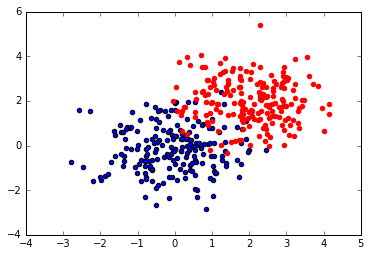

In [43]:
X_test, Y_test = get_data(200)

plt.figure()
plt.scatter(X_test[Y_test==0, 0], X_test[Y_test==0, 1])
plt.scatter(X_test[Y_test==1, 0], X_test[Y_test==1, 1], color='r')

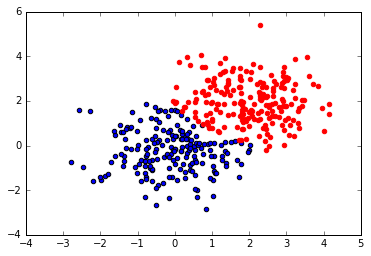

In [44]:
Y_predicted = np.int32(np.round(model.predict(X_test)[:, 0]))
plt.scatter(X_test[Y_predicted==0, 0], X_test[Y_predicted==0, 1])
plt.scatter(X_test[Y_predicted==1, 0], X_test[Y_predicted==1, 1], color='r')